In [16]:
import numpy as np
import math

# Constants
a = 3.0
b = 5.0
n = 10
h = (b - a) / n
k = 3.0

# Function definition: y = x^2
def f(x):
    return x**2

# Initialize arrays
Y = np.zeros(n + 1)      # y[i] = f(x_i)
Y1 = np.zeros(n)         # y1[i] = f(x̄_i) at intermediate points
S = np.zeros(n)          # S_i(x̄_i)
D = np.zeros(n)          # Δ_i = |f(x̄_i) - S_i(x̄_i)|

# Calculate Y values at grid points
for i in range(n + 1):
    x = a + i * h
    Y[i] = f(x)

# Calculate Y1, S, and D at intermediate points
for i in range(n):
    x_intermediate = a + i * h + h / k
    Y1[i] = f(x_intermediate)
    S[i] = Y[i] + (Y[i+1] - Y[i]) / k
    D[i] = abs(Y1[i] - S[i])

# Calculate arithmetic mean (Expectation) A
A = np.sum(D) / n

# Calculate standard deviation σ
sigma = math.sqrt(np.sum((D - A)**2) / (n - 1))

# Print results
print(f"{'i':<4} {'x_i':<8} {'Y[i]':<10} {'x̄_i':<10} {'Y1[i]':<10} {'S[i]':<10} {'D[i]':<10}")
print("-" * 80)

for i in range(n):
    x_grid = a + i * h
    x_intermediate = a + i * h + h / k
    print(f"{i:<4} {x_grid:<8.4f} {Y[i]:<10.4f} {x_intermediate:<10.4f} "
          f"{Y1[i]:<10.4f} {S[i]:<10.4f} {D[i]:<10.6f}")

print(f"\nLast grid point: x_{n} = {a + n * h:.4f}, Y[{n}] = {Y[n]:.4f}")
print("\n" + "=" * 80)
print(f"Arithmetic mean (Expectation) A = {A:.6f}")
print(f"Standard deviation σ = {sigma:.6f}")
print("=" * 80)

# Additional analysis
print(f"\nAdditional statistics:")
print(f"Maximum error: {np.max(D):.6f}")
print(f"Minimum error: {np.min(D):.6f}")
print(f"Mean squared error: {np.mean(D**2):.6f}")

i    x_i      Y[i]       x̄_i       Y1[i]      S[i]       D[i]      
--------------------------------------------------------------------------------
0    3.0000   9.0000     3.0667     9.4044     9.4133     0.008889  
1    3.2000   10.2400    3.2667     10.6711    10.6800    0.008889  
2    3.4000   11.5600    3.4667     12.0178    12.0267    0.008889  
3    3.6000   12.9600    3.6667     13.4444    13.4533    0.008889  
4    3.8000   14.4400    3.8667     14.9511    14.9600    0.008889  
5    4.0000   16.0000    4.0667     16.5378    16.5467    0.008889  
6    4.2000   17.6400    4.2667     18.2044    18.2133    0.008889  
7    4.4000   19.3600    4.4667     19.9511    19.9600    0.008889  
8    4.6000   21.1600    4.6667     21.7778    21.7867    0.008889  
9    4.8000   23.0400    4.8667     23.6844    23.6933    0.008889  

Last grid point: x_10 = 5.0000, Y[10] = 25.0000

Arithmetic mean (Expectation) A = 0.008889
Standard deviation σ = 0.000000

Additional statistics:
Maximum err

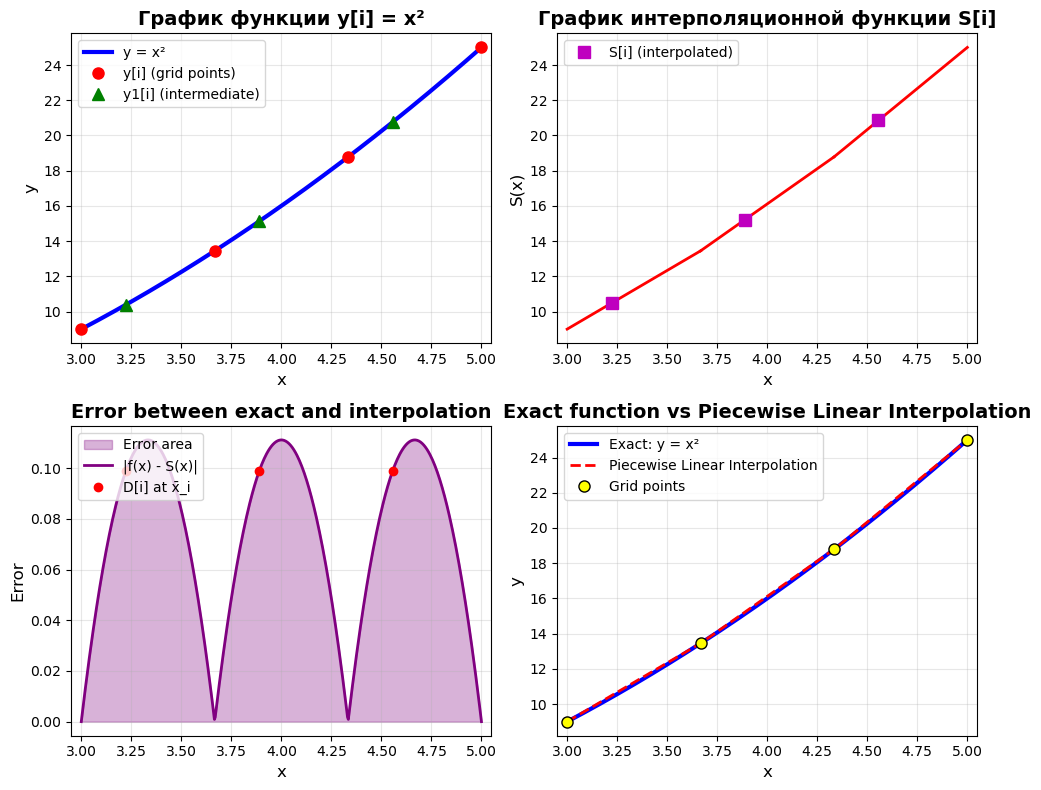

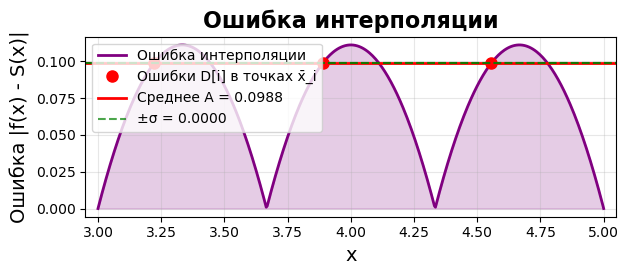

i   x_i        Y[i]         x̄_i         Y1[i]        S[i]         D[i]         Δ_i/Y1[i] (%)
0   3.0000     9.0000       3.2222       10.3827      10.4815      0.098765     0.9512      
1   3.6667     13.4444      3.8889       15.1235      15.2222      0.098765     0.6531      
2   4.3333     18.7778      4.5556       20.7531      20.8519      0.098765     0.4759      

СТАТИСТИКА ОШИБОК:
Среднее арифметическое (мат. ожидание) A = 0.098765
Стандартное отклонение σ = 0.000000
Максимальная ошибка: 0.098765 (при i = 2)
Минимальная ошибка: 0.098765 (при i = 0)
Среднеквадратичная ошибка: 0.098765


In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Constants
a = 3.0
b = 5.0
n = 3
h = (b - a) / n
k = 3.0

# Function definition: y = x^2
def f(x):
    return x**2

# Initialize arrays
Y = np.zeros(n + 1)      # y[i] = f(x_i)
Y1 = np.zeros(n)         # y1[i] = f(x̄_i) at intermediate points
S = np.zeros(n)          # S_i(x̄_i)
D = np.zeros(n)          # Δ_i = |f(x̄_i) - S_i(x̄_i)|

# Calculate Y values at grid points
x_grid = np.zeros(n + 1)
for i in range(n + 1):
    x_grid[i] = a + i * h
    Y[i] = f(x_grid[i])

# Calculate Y1, S, and D at intermediate points
x_intermediate = np.zeros(n)
for i in range(n):
    x_intermediate[i] = a + i * h + h / k
    Y1[i] = f(x_intermediate[i])
    S[i] = Y[i] + (Y[i+1] - Y[i]) / k
    D[i] = abs(Y1[i] - S[i])

# Calculate arithmetic mean (Expectation) A
A = np.sum(D) / n

# Calculate standard deviation σ
sigma = math.sqrt(np.sum((D - A)**2) / (n - 1))

# Create piecewise linear interpolation function
def S_piecewise(x):
    """
    Piecewise linear interpolation function S(x)
    """
    if x < a or x > b:
        return None
    
    for i in range(n):
        if x_grid[i] <= x <= x_grid[i+1]:
            return Y[i] + (Y[i+1] - Y[i]) * (x - x_grid[i]) / h
    return None

# Create fine grid for smooth plots
x_fine = np.linspace(a, b, 500)
y_exact_fine = f(x_fine)
y_interp_fine = np.array([S_piecewise(x) for x in x_fine])

# ============================================
# ГРАФИК 1: График функции y[i]
# ============================================
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(x_fine, y_exact_fine, 'b-', linewidth=3, label='y = x²')
plt.plot(x_grid, Y, 'ro', markersize=8, label='y[i] (grid points)')
plt.plot(x_intermediate, Y1, 'g^', markersize=8, label='y1[i] (intermediate)')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('График функции y[i] = x²', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xlim(a-0.05, b+0.05)

# ============================================
# ГРАФИК 2: График интерполяционной функции S[i]
# ============================================
plt.subplot(2, 2, 2)

# Plot piecewise linear interpolation
for i in range(n):
    x_seg = np.linspace(x_grid[i], x_grid[i+1], 50)
    y_seg = Y[i] + (Y[i+1] - Y[i]) * (x_seg - x_grid[i]) / h
    plt.plot(x_seg, y_seg, 'r-', linewidth=2)

# Mark interpolation points S[i]
plt.plot(x_intermediate, S, 'ms', markersize=8, label='S[i] (interpolated)')

plt.xlabel('x', fontsize=12)
plt.ylabel('S(x)', fontsize=12)
plt.title('График интерполяционной функции S[i]', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xlim(a-0.05, b+0.05)

# ============================================
# ГРАФИК 3: Error between exact and interpolation
# ============================================
plt.subplot(2, 2, 3)

# Calculate error at all points
error_fine = np.abs(y_exact_fine - y_interp_fine)

# Plot error as area
plt.fill_between(x_fine, 0, error_fine, color='purple', alpha=0.3, label='Error area')
plt.plot(x_fine, error_fine, 'purple', linewidth=2, label='|f(x) - S(x)|')

# Mark error at intermediate points
plt.plot(x_intermediate, D, 'ro', markersize=6, label='D[i] at x̄_i')

plt.xlabel('x', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Error between exact and interpolation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xlim(a-0.05, b+0.05)

# ============================================
# ГРАФИК 4: Exact function vs Piecewise Linear Interpolation
# ============================================
plt.subplot(2, 2, 4)

# Plot both functions
plt.plot(x_fine, y_exact_fine, 'b-', linewidth=3, label='Exact: y = x²')
plt.plot(x_fine, y_interp_fine, 'r--', linewidth=2, label='Piecewise Linear Interpolation')

# Mark important points
plt.plot(x_grid, Y, 'ko', markersize=8, markerfacecolor='yellow', label='Grid points')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Exact function vs Piecewise Linear Interpolation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xlim(a-0.05, b+0.05)

plt.tight_layout()
plt.show()

# ============================================
# Дополнительный большой график: Подробное сравнение
# ============================================

# Error plot
plt.subplot(2, 1, 2)
plt.fill_between(x_fine, 0, error_fine, color='purple', alpha=0.2)
plt.plot(x_fine, error_fine, 'purple', linewidth=2, label='Ошибка интерполяции')

# Error at test points
plt.plot(x_intermediate, D, 'ro', markersize=8, label='Ошибки D[i] в точках x̄_i')

# Statistics lines
plt.axhline(y=A, color='red', linestyle='-', linewidth=2, label=f'Среднее A = {A:.4f}')
plt.axhline(y=A+sigma, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label=f'±σ = {sigma:.4f}')
plt.axhline(y=A-sigma, color='green', linestyle='--', linewidth=1.5, alpha=0.7)

plt.xlabel('x', fontsize=14)
plt.ylabel('Ошибка |f(x) - S(x)|', fontsize=14)
plt.title('Ошибка интерполяции', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=10)
plt.xlim(a-0.05, b+0.05)

plt.tight_layout()
plt.show()

# ============================================
# Вывод результатов
# ============================================
print("=" * 120)
print(f"{'i':<3} {'x_i':<10} {'Y[i]':<12} {'x̄_i':<12} {'Y1[i]':<12} {'S[i]':<12} {'D[i]':<12} {'Δ_i/Y1[i] (%)':<12}")
print("=" * 120)

for i in range(n):
    rel_error = 100 * D[i] / (Y1[i] + 1e-10)
    print(f"{i:<3} {x_grid[i]:<10.4f} {Y[i]:<12.4f} {x_intermediate[i]:<12.4f} "
          f"{Y1[i]:<12.4f} {S[i]:<12.4f} {D[i]:<12.6f} {rel_error:<12.4f}")

print("=" * 120)
print(f"\nСТАТИСТИКА ОШИБОК:")
print(f"Среднее арифметическое (мат. ожидание) A = {A:.6f}")
print(f"Стандартное отклонение σ = {sigma:.6f}")
print(f"Максимальная ошибка: {np.max(D):.6f} (при i = {np.argmax(D)})")
print(f"Минимальная ошибка: {np.min(D):.6f} (при i = {np.argmin(D)})")
print(f"Среднеквадратичная ошибка: {np.sqrt(np.mean(D**2)):.6f}")
print("=" * 120)